# Airbnb Listings in Sevilla
---

### Importing necessary Python packages

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    ConfusionMatrixDisplay
)

In [2]:
# setting chart properties
sns.set_theme(style="whitegrid", palette="mako",font_scale=1.1)

### Data Load

In [3]:
# loading dataset
df = pd.read_csv("sevilla.listings.csv")

In [4]:
# dataset head
df.head(5).T

,0,1,2,3,4
id,49287,108236,111140,159596,179629
name,BEAUTIFUL APARTMENT IN SEVILLE,Sunny apt in heart of seville!!,Quiet&historicenter&local experienc,apto lujo 2 D en el Arenal (Sevilla),Bamberg Duplex Terraza Centro Historico 5 pax
host_id,224697,560040,560040,629861,860055
host_name,Walter,José Luis,José Luis,Alvaro,Maria
neighbourhood_group,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo
neighbourhood,San Lorenzo,San Vicente,San Vicente,Arenal,Santa Cruz
latitude,37.39898,37.396858,37.395924,37.38671,37.38731
longitude,-5.99533,-5.999127,-5.999317,-5.99581,-5.99095
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,93.0,120.0,89.0,NaN,146.0


### Exploratory Data Analysis

#### Dataset Structure

In [5]:
# dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (8215, 18)


In [6]:
# column info
print("\nColumn Information: ")
df.info()


Column Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8215 non-null   int64  
 1   name                            8215 non-null   object 
 2   host_id                         8215 non-null   int64  
 3   host_name                       8210 non-null   object 
 4   neighbourhood_group             8215 non-null   object 
 5   neighbourhood                   8215 non-null   object 
 6   latitude                        8215 non-null   float64
 7   longitude                       8215 non-null   float64
 8   room_type                       8215 non-null   object 
 9   price                           7581 non-null   float64
 10  minimum_nights                  8215 non-null   int64  
 11  number_of_reviews               8215 non-null   int64  
 12  last_review 

In [7]:
# basic statistics
print("\nBasic Statistics (for numeric columns):")
df.describe().T



Basic Statistics (for numeric columns):


,count,mean,std,min,25%,50%,75%,max
id,8215.0,5.909007e+17,5.728057e+17,49287.00000,3.361737e+07,6.613500e+17,1.120606e+18,1.518679e+18
host_id,8215.0,2.163434e+08,2.063576e+08,163002.00000,3.704024e+07,1.519127e+08,3.703322e+08,7.204714e+08
latitude,8215.0,3.739013e+01,9.378348e-03,37.31683,3.738607e+01,3.738999e+01,3.739556e+01,3.743889e+01
longitude,8215.0,-5.990909e+00,1.174225e-02,-6.01478,-5.997479e+00,-5.992309e+00,-5.986895e+00,-5.903501e+00
price,7581.0,2.091791e+02,6.784108e+02,12.00000,9.000000e+01,1.250000e+02,1.800000e+02,1.000000e+04
minimum_nights,8215.0,3.146318e+00,1.091615e+01,1.00000,1.000000e+00,2.000000e+00,2.000000e+00,3.650000e+02
number_of_reviews,8215.0,8.339696e+01,1.253807e+02,0.00000,6.000000e+00,3.300000e+01,1.100000e+02,1.341000e+03
reviews_per_month,7490.0,1.822936e+00,1.710673e+00,0.01000,4.900000e-01,1.310000e+00,2.720000e+00,2.682000e+01
calculated_host_listings_count,8215.0,2.036360e+01,3.775492e+01,1.00000,1.000000e+00,5.000000e+00,2.300000e+01,2.050000e+02
availability_365,8215.0,1.837447e+02,1.117883e+02,0.00000,8.100000e+01,1.910000e+02,2.845000e+02,3.650000e+02


#### Missing Values

In [8]:
# missing values percentage per column
missing_values = df.isnull().mean().sort_values(ascending=False)*100
missing_values = missing_values[missing_values > 0]

print("Missing values (%): ")
round(missing_values, 2)

Missing values (%): 


last_review          8.83
reviews_per_month    8.83
price                7.72
license              1.63
host_name            0.06
dtype: float64

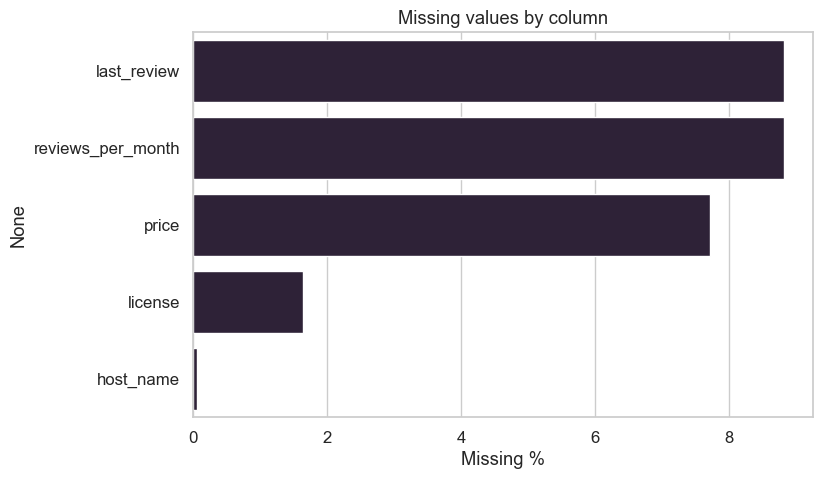

In [9]:
# missing values bar plot
plt.figure(figsize=(8,5))
sns.barplot(
    x=missing_values.values,
    y=missing_values.index
)
plt.xlabel("Missing %")
plt.title("Missing values by column")
plt.show()

#### Key Categorical Variables

In [10]:
# key categorical variables
key_categorical_varialbes = [
    "room_type",
    "neighbourhood",
    "license"
]


Value counts for room_type:


room_type
Entire home/apt    6993
Private room       1182
Hotel room           21
Shared room          19
Name: count, dtype: int64


Value counts for neighbourhood:


neighbourhood
Alfalfa                 895
Santa Cruz              690
Arenal                  631
San Bartolomé           613
Feria                   558
Triana Casco Antiguo    498
Encarnación, Regina     465
San Vicente             332
San Gil                 309
Santa Catalina          299
Name: count, dtype: int64


Value counts for license:


license
Exempt                           355
-                                 35
H/SE-0114                         34
A/SE/00218                        33
Cód. Reg. Turismo: H/SE/00508     27
H/SE-0393                         21
VFT/SE/04157                      16
CTC2018193357                     15
VFT/SE/00543                      15
CTC-2021409146                    14
Name: count, dtype: int64

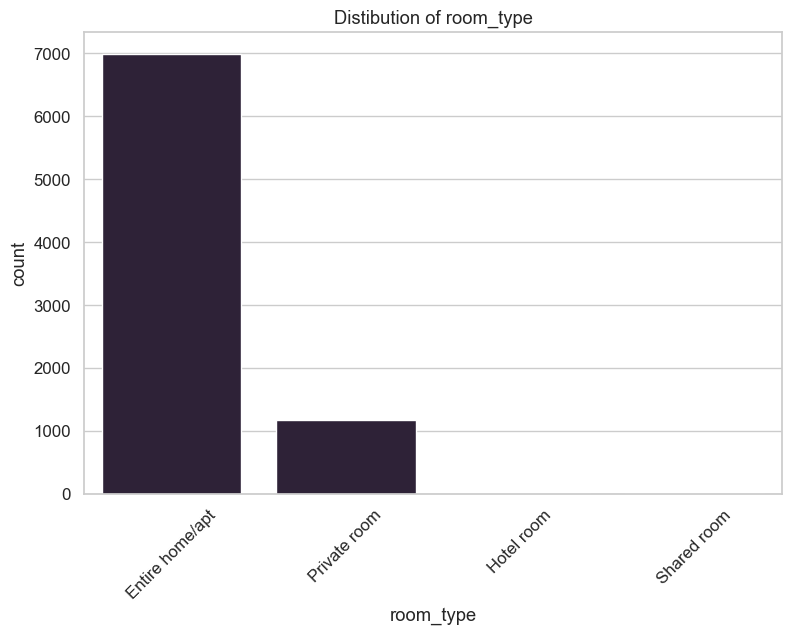

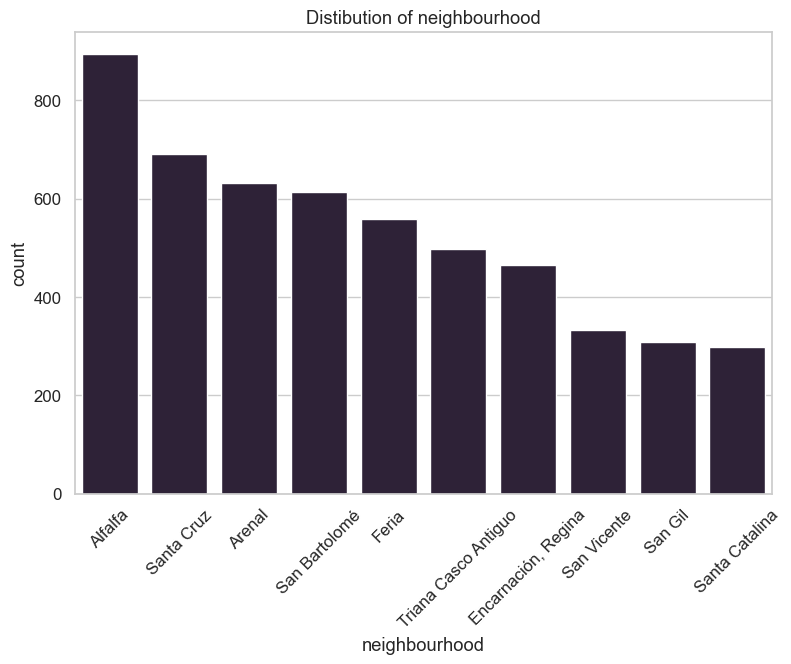

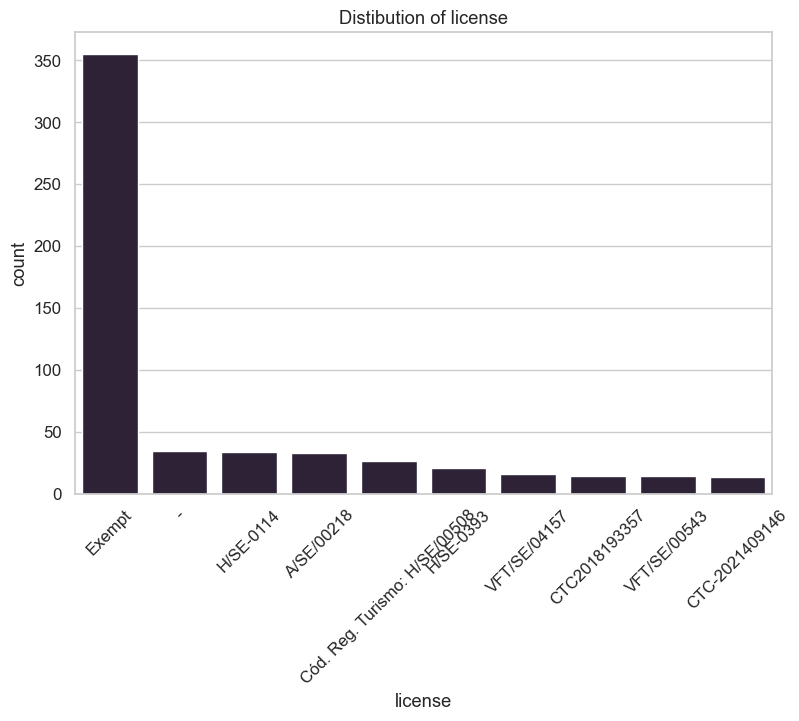

In [11]:
# key categorical variables plots
for variable in key_categorical_varialbes:
    if variable in df.columns:
        print(f"\nValue counts for {variable}:")
        display(df[variable].value_counts().head(10))
        
        plt.figure(figsize=(9,6))
        sns.countplot(
            data = df, 
            x= variable, 
            order=df[variable].value_counts().index[:10]
        )
        plt.xticks(rotation=45)
        plt.title(f"Distibution of {variable}")
        plt.show

#### Key Numerical Variables

In [12]:
# key numerical variables
key_numerical_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "number_of_reviews_ltm",
    "calculated_host_listings_count"
]

<function matplotlib.pyplot.show(close=None, block=None)>

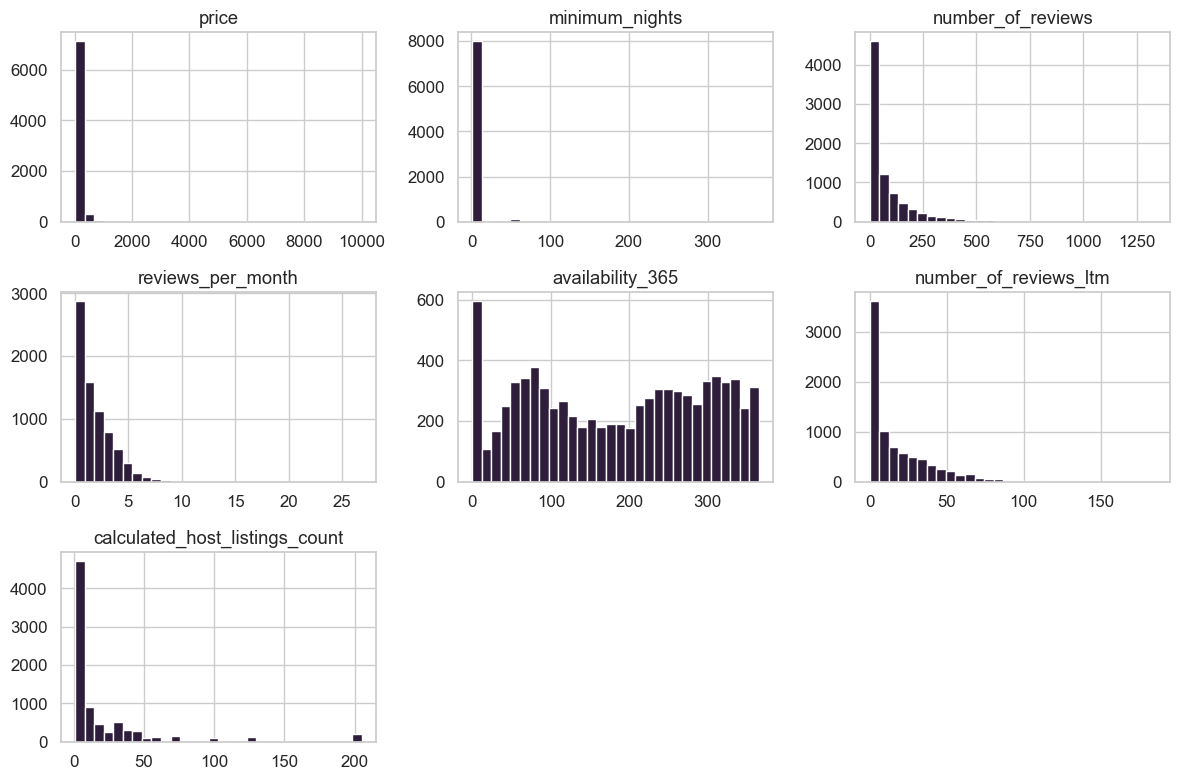

In [13]:
# key numerical variables plots
df[key_numerical_variables].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show

#### Price relationships

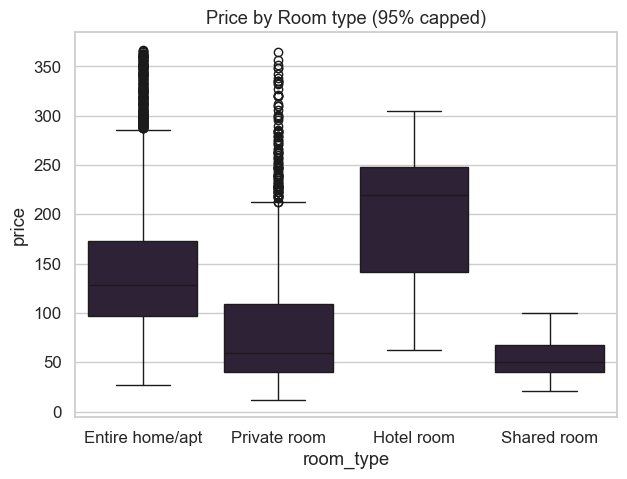

In [14]:
# relationship between price and room type
if "room_type" in df.columns:
    df_without_outliers = df[
        df["price"] < df["price"].quantile(0.95)
    ]
    plt.figure(figsize=(7,5))
    sns.boxplot(
        data = df_without_outliers,
        x = "room_type",
        y = "price"
    )
    plt.title("Price by Room type (95% capped)")
    plt.show()

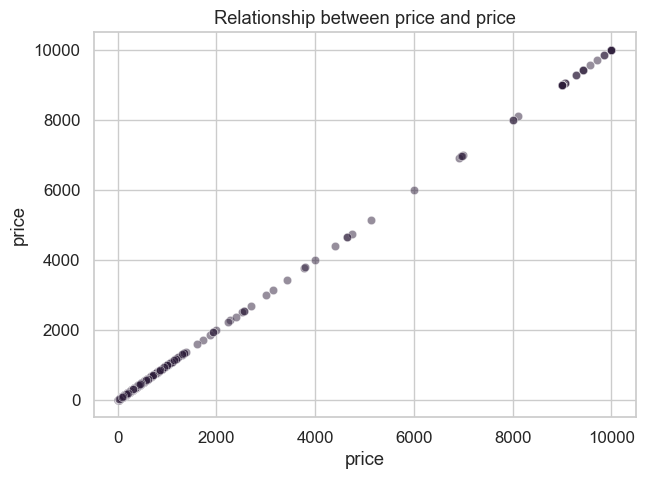

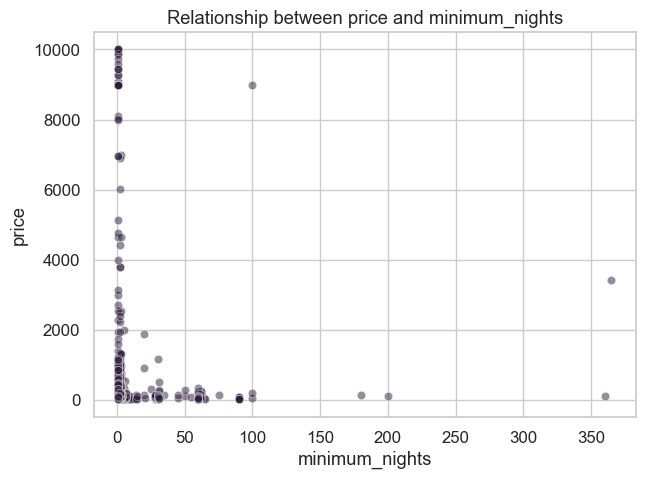

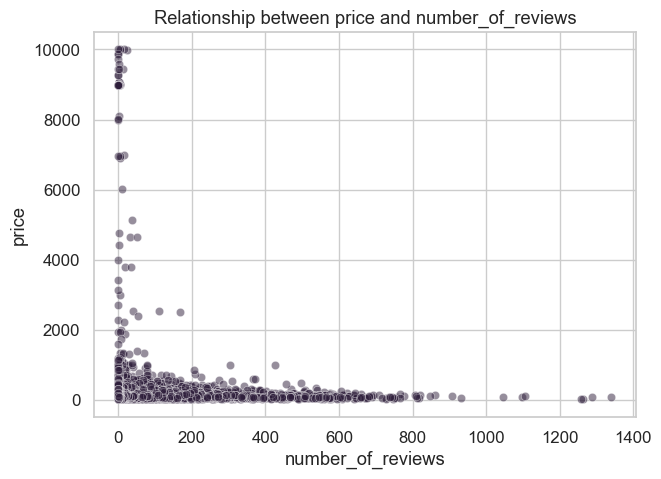

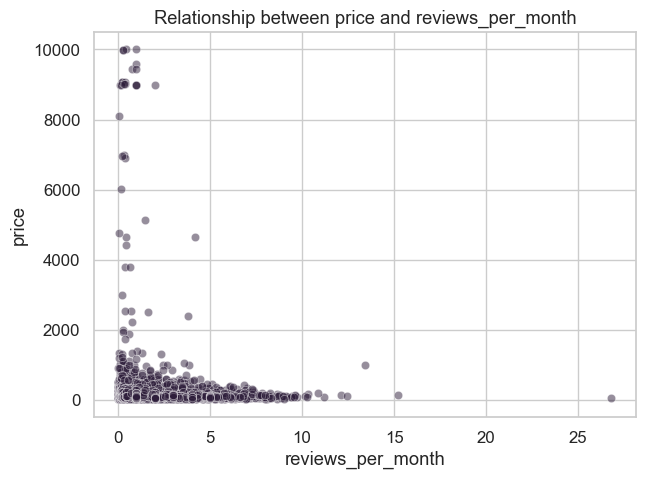

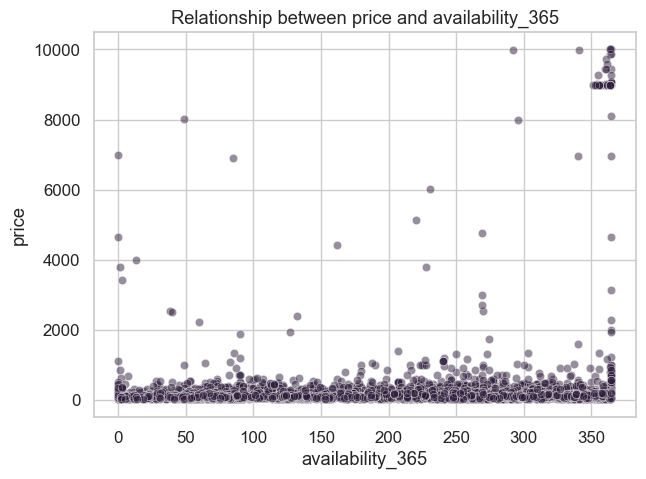

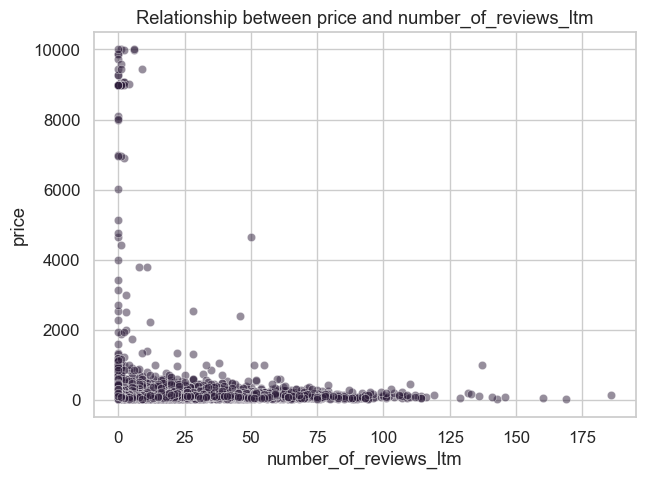

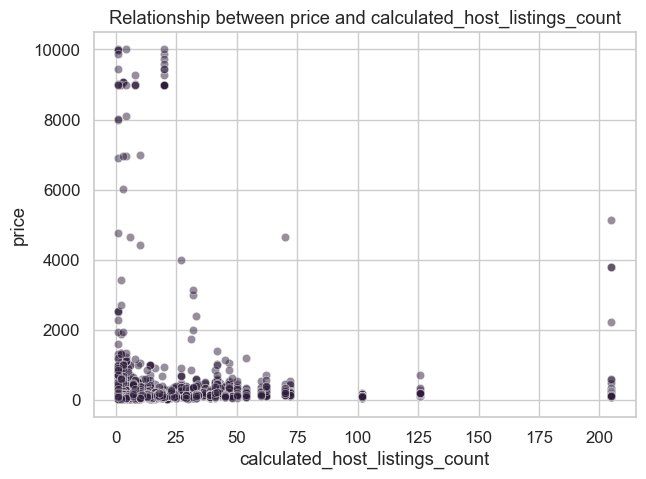

In [15]:
# relationship between price and key numeric variables
for variable in key_numerical_variables:
    if variable in df.columns:
        plt.figure(figsize=(7,5))
        sns.scatterplot(
            data=df,
            x = variable,
            y="price",
            alpha = 0.5
        )
        plt.title(f"Relationship between price and {variable}")
        plt.show()

#### Correlation matrix

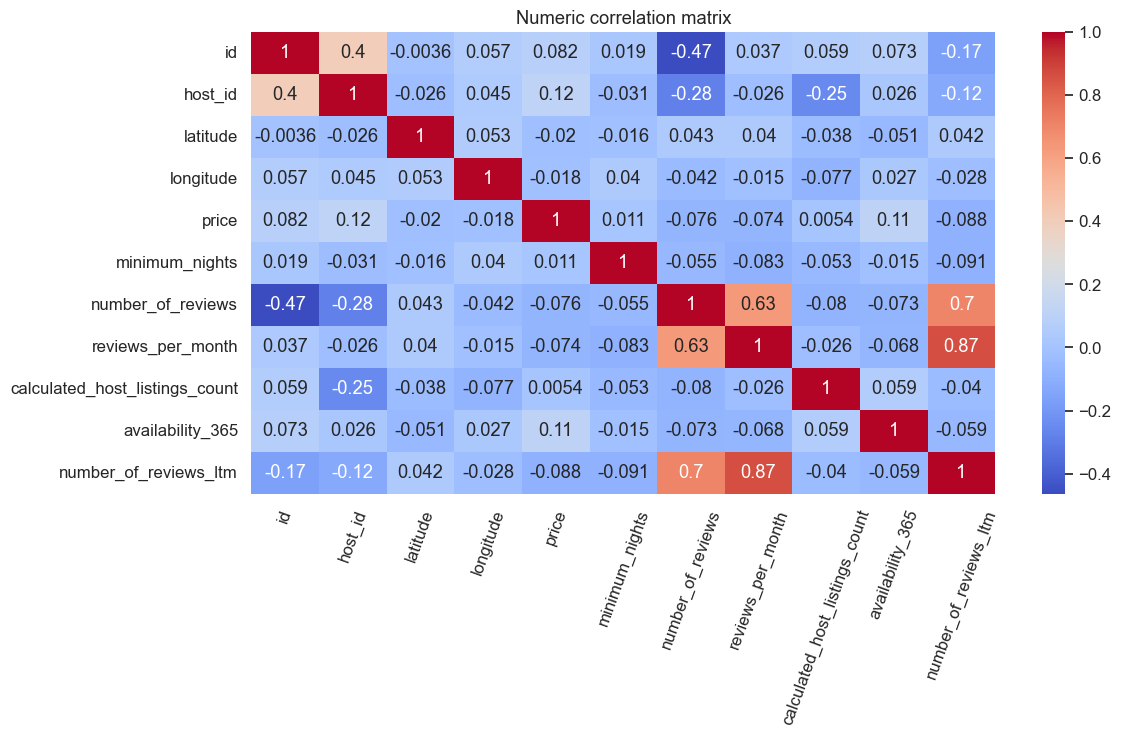

In [16]:
# correlation matrix
numerical_variables = df.select_dtypes(
    include=['int64','float64']
)

plt.figure(figsize=(12,6))
sns.heatmap(
    numerical_variables.corr(),
    cmap="coolwarm",
    annot=True
)
plt.title("Numeric correlation matrix")
plt.xticks(rotation=70)
plt.show()

### Data Preparation

In [17]:
# handling missing values
# dropping columns: last_review, price, license, host_name
df = df.dropna(
    subset=[
        "last_review",
        "price",
        "license",
        "host_name"
    ]
).reset_index(drop=True)

# filling reviews_per_month with medians
df["reviews_per_month"] = df["reviews_per_month"].fillna(
    df["reviews_per_month"].median()
)

In [18]:
# outliers
# capping price outliers using IQR
price_q1 = df["price"].quantile(0.25)
price_q3 = df["price"].quantile(0.75)
price_iqr = price_q3-price_q1

df["price"] = df["price"].clip(upper=price_q3+(1.5*price_iqr))

# capping minimum_nights outliers using IQR
minimum_nights_q1 = df["minimum_nights"].quantile(0.25)
minimum_nights_q3 = df["minimum_nights"].quantile(0.75)
minimum_nights_iqr = minimum_nights_q3-minimum_nights_q1

df["minimum_nights"] = df["minimum_nights"].clip(upper=minimum_nights_q3+(1.5*minimum_nights_iqr))

In [19]:
# creating binary target variable - high_price, which takes values 1: for high prices and 0: for low prices
price_threshold = df["price"].median()
df["high_price"] = (
    df["price"] >= price_threshold
).astype(int)

In [20]:
# encoding and scaling
# selecting relevant numeric features
df_numeric_features = [
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "number_of_reviews_ltm",
    "calculated_host_listings_count",
    "latitude",
    "longitude"
]

# selecing relevant categorical features
df_categorical_features = [
    "neighbourhood",
    "room_type"
]

# scaling numeric features via standardscaler and encoding categorical features via onehotencoder
df_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), df_numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), df_categorical_features)
    ]
)

In [21]:
# diving dataset to train and test

df_features = [
    "neighbourhood", 
    "room_type", 
    "minimum_nights",
    "number_of_reviews", 
    "reviews_per_month",
    "availability_365", 
    "number_of_reviews_ltm",
    "calculated_host_listings_count", 
    "latitude", 
    "longitude"
]

X = df[df_features]
y = df["high_price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Model Training and Evaluation

In [22]:
# three selected models: LogisticRegression, RandomForest and GradientBoosting

models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(),
    "GradintBoosting": GradientBoostingClassifier()
}

In [23]:
# training and evaluation

results = {}

for name, model in models.items():
    pipe = Pipeline(
        [
            ("preprocess", df_preprocessor),
            ("model", model)
        ]
    )
    
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    probabilities = pipe.predict_proba(X_test)[:,1]

    results[name] = {
        "accuracy": accuracy_score(y_test, predictions),
        "precision": precision_score(y_test, predictions),
        "recall": recall_score(y_test, predictions),
        "f1": f1_score(y_test, predictions),
        "auc": roc_auc_score(y_test, probabilities)
    }

results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1,auc
LogisticRegression,0.715116,0.715092,0.727403,0.721195,0.786894
RandomForest,0.770349,0.777293,0.766141,0.771676,0.852500
GradintBoosting,0.744186,0.743300,0.756098,0.749644,0.832198


LogisticRegression


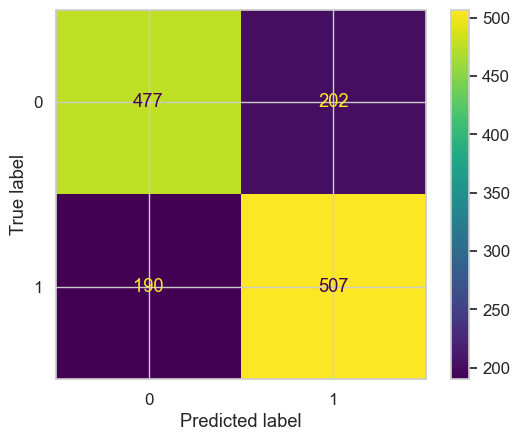

RandomForest


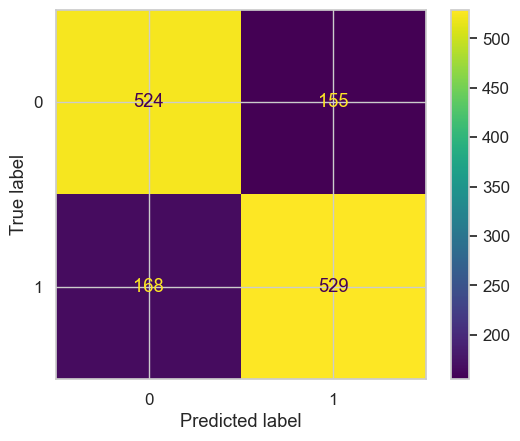

GradintBoosting


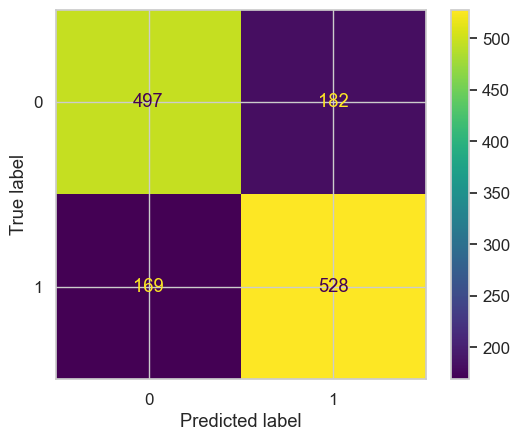

In [24]:
# confusion matrices

for name, model in models.items():
    pipe = Pipeline(
        [
            ("preprocess", df_preprocessor),
            ("model", model)
        ]
    )
    
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    
    print(name)
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

### Deployment

In [25]:
# best selected model: RandomForest
# creating a separate pipeline for RandomForest for Streamlit

best_model = RandomForestClassifier()
best_pipeline = Pipeline(
    [
        ("preprocess", df_preprocessor),
        ("model", best_model)
    ]
)

best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'availability_365',
                                                   'number_of_reviews_ltm',
                                                   'calculated_host_listings_count',
                                                   'latitude', 'longitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood',
                                                   'room_type'])])),
                ('model', RandomForestClassifier())])

In [26]:
# saving the final model pipeline
joblib.dump(best_pipeline, "final_model_pipeline.pkl")

['final_model_pipeline.pkl']

In [31]:
# testing the work of best_pipeline
test_pipe = joblib.load("final_model_pipeline.pkl")
sample = X_test.sample(1)

print("Prediction:", test_pipe.predict(sample))
print("Probability:", test_pipe.predict_proba(sample))

Prediction: [0]
Probability: [[0.7 0.3]]
